# Descriptive Statistics Exercises

## Important Notes

**IMPORTANT NOTE 1:** Please remember to **run your code cells** so that you can see the output of your codes.

**IMPORTANT NOTE 2:** By default, Jupyter Notebook will only display the output of the last command in a Code cell. Thus, if you have multiple commands in a Code cell and you need to print output of a Python command in the middle of the cell, you have two options: 
- Option 1: Break your Code cell into multiple Code cells and place only one command in each cell so that you can display output of each command.
- Option 2: (**Preferred**) In a Code cell, put print() statements around each Python command whose output you would like to display.

## Tutorial Overview

In this exercise, you will gain insight into public health by generating simple graphical and numerical summaries of a dataset collected by the U.S. Centers for Disease Control and Prevention (CDC).

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage.

Data source: cdc.gov/brfss

We will focus on a random sample of 60 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset. 



**Exercise 1:** Import the `numpy` and `pandas` modules in as `np` and `pd` respectively. Then place the `cdc_sample.csv` into the same directory as this notebook and read in the data as `cdc`. Display the first 5 rows of the data. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

# how to read a csv file from a github account
url_name = 'https://raw.githubusercontent.com/akmand/datasets/master/cdc_sample.csv'
url_content = requests.get(url_name, verify=False).content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# cdc = pd.read_csv("cdc_sample.csv")

cdc.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,1,1,1,75,265,225,45,m,very good
1,1,1,0,72,150,150,24,m,excellent
2,1,1,1,69,137,150,47,m,excellent
3,1,1,1,66,159,125,26,f,good
4,1,1,0,63,145,125,33,f,very good


**Exercise 2:** How many variables are there in this dataset? For each variable, identify its data type (e.g., categorical, numerical). If categorical, state the number of levels.

**Hint:** Try using Pandas' `info()` method on your data frame. In the output of this method, `object` data type ("dtype") stands for a string type, which usually indicates a categorical variable. On the hand, some numerical variables can actually be categorical in nature (think about hlthplan, for instance). This can be verified when coupled with the `nunique()` function.



In [2]:
print(f"There are {cdc.shape[1]} variables in this dataset")

There are 9 variables in this dataset


In [3]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   exerany   60 non-null     int64 
 1   hlthplan  60 non-null     int64 
 2   smoke100  60 non-null     int64 
 3   height    60 non-null     int64 
 4   weight    60 non-null     int64 
 5   wtdesire  60 non-null     int64 
 6   age       60 non-null     int64 
 7   gender    60 non-null     object
 8   genhlth   60 non-null     object
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [4]:
cdc.nunique()

exerany      2
hlthplan     2
smoke100     2
height      16
weight      35
wtdesire    25
age         35
gender       2
genhlth      5
dtype: int64

In [5]:
print("""
Categorical variables: 
genhlth (ordinal, five levels), exerany (binary, that is, two levels), 
hlthplan (binary), smoke100 (binary) and gender (binary)
""")

print("""
Numerical variables: 
height, weight, wtdesire and age
""")


Categorical variables: 
genhlth (ordinal, five levels), exerany (binary, that is, two levels), 
hlthplan (binary), smoke100 (binary) and gender (binary)


Numerical variables: 
height, weight, wtdesire and age



**Exercise 3:** What are the levels in `genhlth`? and how many people fall under each level?

**Hint:** you can use Pandas' `value_counts()` function.

In [6]:
cdc['genhlth'].value_counts()

very good    18
excellent    17
good         17
fair          7
poor          1
Name: genhlth, dtype: int64

In [7]:
print(f"""
The levels of genhlth are {cdc['genhlth'].unique()}, 
the number of people in each group are {cdc['genhlth'].value_counts().values} respectively.
""")


The levels of genhlth are ['very good' 'excellent' 'good' 'fair' 'poor'], 
the number of people in each group are [18 17 17  7  1] respectively.



**Exercise 4:** Import `matplotlib.pyplot` as `plt` and create a scatterplot of `height` and `weight`, ensuring that the plot has an appropriate title and axis labels. What is the association between these two variables? 

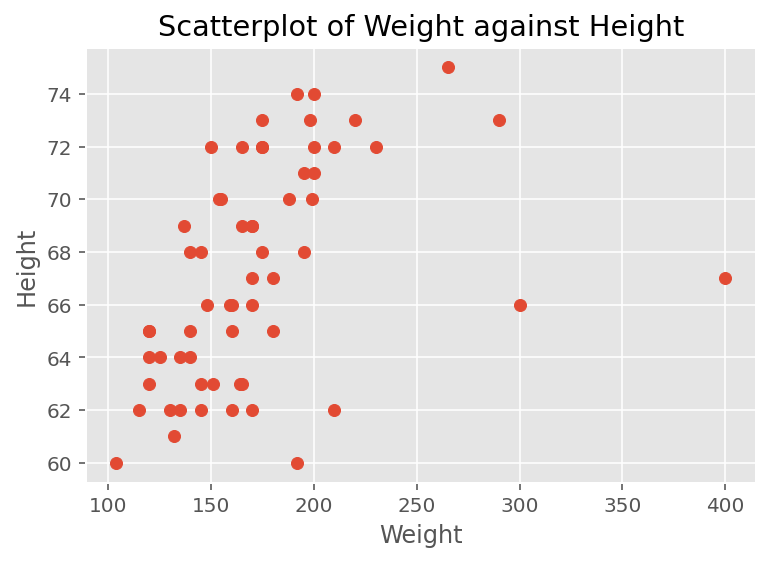

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# creating scatterplot
plt.scatter(cdc['weight'], cdc['height'])
plt.title('Scatterplot of Weight against Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [9]:
print("Height and Weight are positively associated.")

Height and Weight are positively associated.


**Exercise 5:** Find the mean, sample standard deviation, and median of `weight`.

In [10]:
print('mean: ', round(cdc['weight'].mean(), 3))
print('std: ', round(cdc['weight'].std(ddof = 1), 3))
print('median: ', cdc['weight'].median())

mean:  173.3
std:  49.035
median:  165.0


**Exercise 6:** Find the mean, sample standard deviation, and median of `weight` for respondents who exercised in the past month. Is there any significant difference in the results when compared to the results of Exercise 5?

**Hint:** `exerany` is the variable that is 1 if the respondent exercised in the past month and 0 otherwise.

In [11]:
print('mean: ', round(cdc[cdc['exerany'] == 1]['weight'].mean(), 3))
print('std: ', round(cdc[cdc['exerany'] == 1]['weight'].std(ddof = 1), 3))
print('median: ', cdc[cdc['exerany'] == 1]['weight'].median())

print("Compared with the previous results, there seems to be no significant difference.")

mean:  169.733
std:  36.668
median:  170.0
Compared with the previous results, there seems to be no significant difference.


**Exercise 7:** Create a histogram of `weight` from the data examined in Exercise 5 and 6 on the same plot. Ensuring that your plot has an appropriate title, axis labels and legend. Does this histogram support your answer in question 6? Also comment of the shape of the distribution.

**Hint:** The `alpha` argument of plotting can be used to change the level of transparacy.

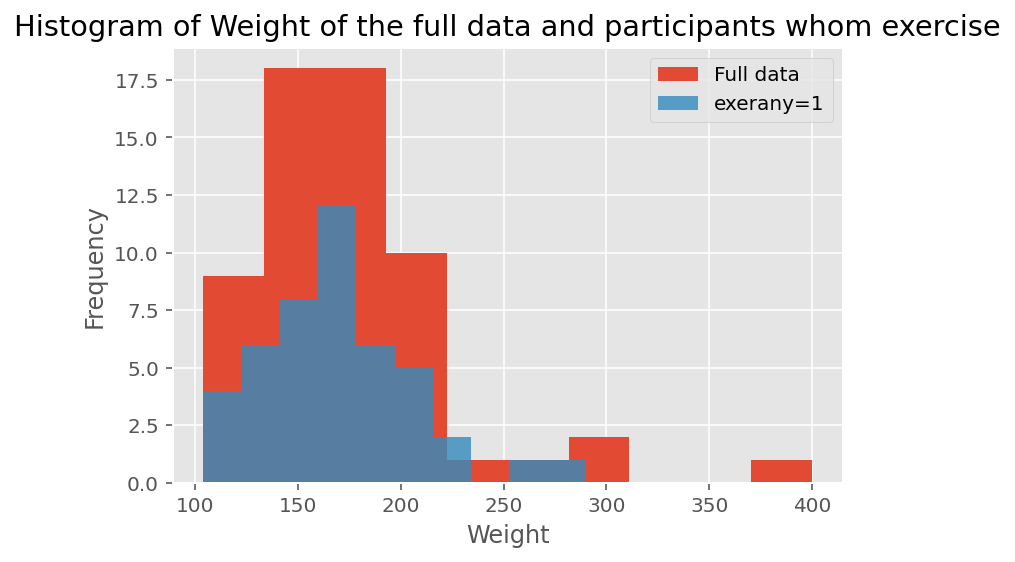

In [12]:
# creating histogram
plt.hist(cdc['weight'], label = 'Full data')
plt.hist(cdc[cdc['exerany'] == 1]['weight'], label ='exerany=1', alpha = 0.8)

plt.title('Histogram of Weight of the full data and participants whom exercise')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
print("Yes, the distribution of those who exercise appears the same as the full data.")
print("The distribution is unimodal and right skewed. There may be potential outliers.")

Yes, the distribution of those who exercise appears the same as the full data.
The distribution is unimodal and right skewed. There may be potential outliers.


**Exercise 8:** Continuing our investigation into the `weight` variable compute the: 

- 5-number summary in ascending order (that is, min, Q1, Q2 (median), Q3, and max). 
- interquartile range (IQR) for this variable (which is Q3-Q1). 
- max upper whisker reach and max lower whisker reach. Based on these values, how many outliers are there for `weight`? 

Finally, using Matplotlib, create a boxplot for this variable.

**Hint:** For quantiles, you can use `np.quantile()`.

In [14]:
# 5 number summary
min_val = cdc['weight'].min()
q1_val  = cdc['weight'].quantile(0.25)
q2_val  = cdc['weight'].quantile(0.50)  # this is also the median
q3_val  = cdc['weight'].quantile(0.75)
max_val = cdc['weight'].max()

print('min:', min_val)
print('q1:', q1_val)
print('q2 (median):', q2_val)
print('q3:', q3_val)
print('max:', max_val)


min: 104
q1: 143.75
q2 (median): 165.0
q3: 192.75
max: 400


In [15]:
# IQR
iqr = q3_val - q1_val
print('IQR:', iqr)

IQR: 49.0


In [16]:
# Whiskers
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
print('max_whisker:', max_whisker)
print('min_whisker:', min_whisker)

max_whisker: 266.25
min_whisker: 70.25


In [17]:
# Outliers
wtdesire_outliers = cdc[(cdc['weight'] < min_whisker) | 
                        (cdc['weight'] > max_whisker)]['weight']

print('Number of "weight" outliers:', wtdesire_outliers.shape[0])

Number of "weight" outliers: 3


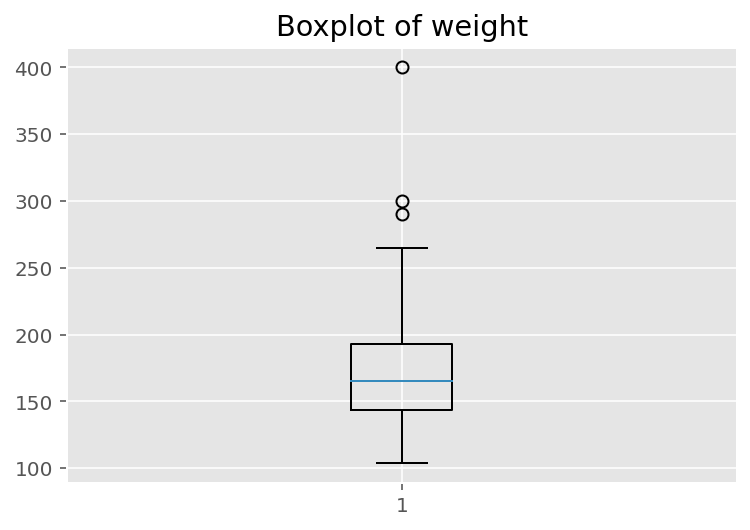

In [18]:
# boxplot
plt.boxplot(x=cdc['weight'])
plt.title("Boxplot of weight")
plt.show();

**Exercise 9:** Similarly for the `wtdesire` compute the 5 number summary. Produce a boxplot of both `wtdesire` and `weight`.

Then compare it with the results from Exercise 8 and comment on the boxplot. 

In [19]:
# 5 number summary
min_val = cdc['wtdesire'].min()
q1_val  = cdc['wtdesire'].quantile(0.25)
q2_val  = cdc['wtdesire'].quantile(0.50)  # this is also the median
q3_val  = cdc['wtdesire'].quantile(0.75)
max_val = cdc['wtdesire'].max()

print('min:', min_val)
print('q1:', q1_val)
print('q2 (median):', q2_val)
print('q3:', q3_val)
print('max:', max_val)

min: 104
q1: 135.0
q2 (median): 150.0
q3: 176.25
max: 225


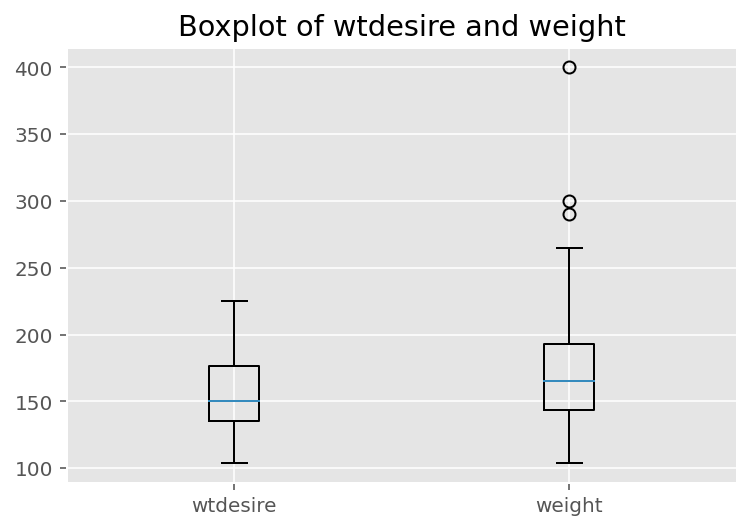

In [20]:
# boxplot
plt.boxplot(x=[cdc['wtdesire'], cdc['weight']])
plt.title("Boxplot of wtdesire and weight")
plt.xticks([1,2],['wtdesire', 'weight'])
plt.show();

In [21]:
print("""
There are no outliers for wtdesire. 
With the exception of the minimum value all other measures 
in the 5 number summary are lower for wtdesire compared to weight.
""")


There are no outliers for wtdesire. 
With the exception of the minimum value all other measures 
in the 5 number summary are lower for wtdesire compared to weight.



**Exercise 10:** Create a new data subset called `under25_and_overweight` that contains all respondents under the age of 25 who think their actual weights are over their desired weights. 

How many rows are there in this dataset? 

What percent of respondents under the age 25 think that they are overweight?


In [22]:
# subsetting for those under 25 whose weight is larger than their desired weight
under25_and_overweight = cdc[(cdc['age'] < 25) & (cdc['weight'] > cdc['wtdesire'])]

print(f"There are {under25_and_overweight.shape[0]} respondants under 25 who think they are overweight")



There are 4 respondants under 25 who think they are overweight


In [23]:
# subsetting for those under the age of 25
under25 = cdc[cdc['age'] < 25]

print(f"{round(under25_and_overweight.shape[0] / under25.shape[0] * 100,2)}% of respondents under the age of 25 who think they are overweight")

57.14% of respondents under the age of 25 who think they are overweight


**Exercise 11:** Let's consider a new variable: the difference between desired weight (`wtdesire`) and current weight (`weight`). Create this new variable by subtracting the two columns in the cdc data frame and assigning them to a new variable called `wdiff`.

In [24]:
cdc['wdiff'] = cdc['wtdesire'] - cdc['weight']

**Exercise 12:** What percent of respondents' `wdiff` is zero? Comment on the result.

In [25]:
print(f"Only {cdc['wdiff'][cdc['wdiff'] == 0].shape[0] / cdc.shape[0] * 100}% of the respondents are happy with their current weight.")

Only 30.0% of the respondents are happy with their current weight.


**Exercise 13:** What percent of respondents think they are overweight, that is, their `wdiff` value is less than 0? What percent of respondents think they are underweight?

In [26]:
print(f"Only {cdc['wdiff'][cdc['wdiff'] > 0].shape[0] / cdc.shape[0] * 100}% of the respondents think they are underweight.")
print(f"About {cdc['wdiff'][cdc['wdiff'] < 0].shape[0] / cdc.shape[0] * 100}% of the respondents think they are overweight.")

Only 5.0% of the respondents think they are underweight.
About 65.0% of the respondents think they are overweight.


**Exercise 14:** Make a scatterplot of weight versus desired weight. Set the fill color as blue and alpha level as 0.3. Describe the relationship between these two variables.

**Bonus**: Also fit a red line with a slope of 1 and an intercept value of 0. See [this](https://www.featureranking.com/tutorials/python-tutorials/matplotlib/#Lines) for an example of a line fit. 

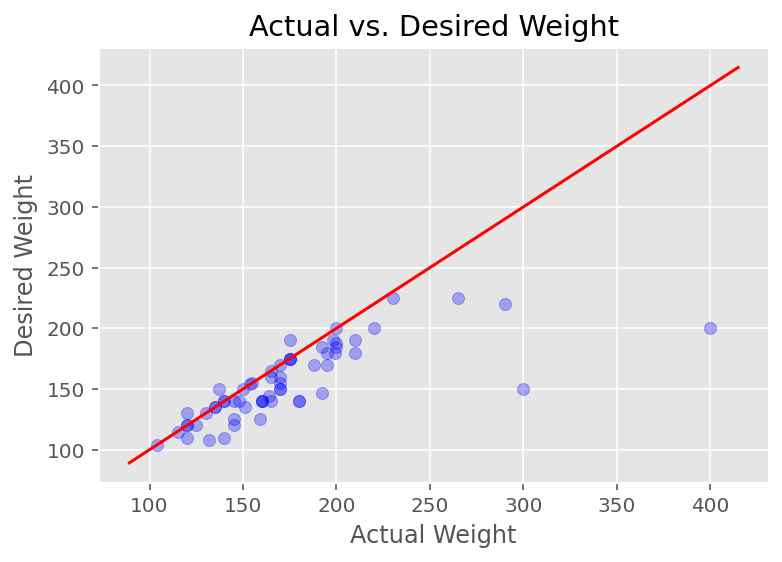


As the weight increases, the desired weight also increases,
but not as much the weight itself. There are more respondents
who think they are overweight compared to underweight
(more points under the line compared to over the line).



In [27]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope + intercept, xmax*slope + intercept], **kargs)
    
x = cdc['weight']
y = cdc['wtdesire']
plt.scatter(x, y,  c = 'blue', alpha = 0.3)
plot_line(axis=plt.gca(), slope=1, intercept=0, color="red")
plt.xlabel('Actual Weight')
plt.ylabel('Desired Weight')
plt.title('Actual vs. Desired Weight')
plt.show();

print("""
As the weight increases, the desired weight also increases,
but not as much the weight itself. There are more respondents
who think they are overweight compared to underweight
(more points under the line compared to over the line).
""")

**Exercise 15:** Create a side-by-side boxplot to determine if men tend to view their weight differently than women.

**Hint**: For this, you will need to use the [Seaborn module](https://www.featureranking.com/tutorials/python-tutorials/seaborn/#Boxplots).

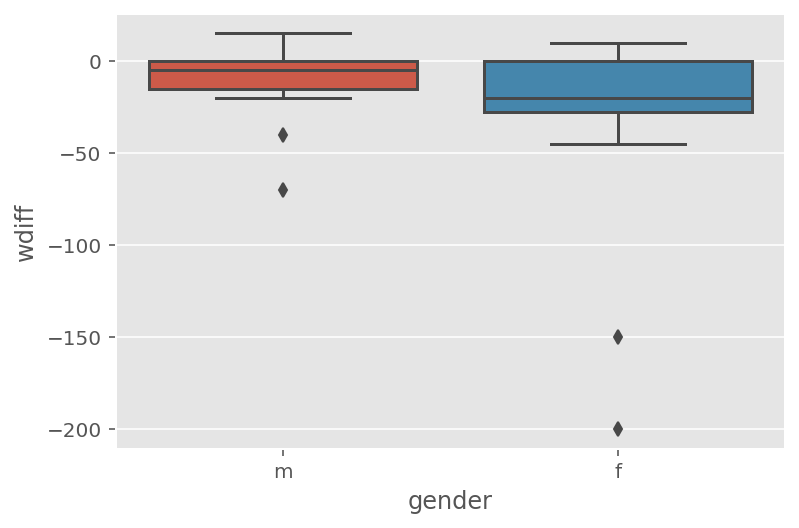


There seems to be a difference between actual weight and desired weight distribution for men vs. women.
The medians, quantile1 and lower whisker are lower for women.



In [28]:
import seaborn as sns
sns.boxplot(x = cdc['gender'], y = cdc['wdiff'])
plt.show(); 

print("""
There seems to be a difference between actual weight and desired weight distribution for men vs. women.
The medians, quantile1 and lower whisker are lower for women.
""")

***
www.featureranking.com